In [1]:
import tensorflow as tf
from keras.src import layers
from keras.src.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess data
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Reshape to (28, 28, 1) for CNN
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
model = keras.Sequential([
    layers.Input((28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(128, (4, 4), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

In [4]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [5]:
early_stop = EarlyStopping(monitor="val_accuracy", patience=6, restore_best_weights=True)

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_images,
    train_labels,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop, lr_schedule],
)


Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.8836 - loss: 0.3825 - val_accuracy: 0.9875 - val_loss: 0.0416 - learning_rate: 0.0010
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.9813 - loss: 0.0600 - val_accuracy: 0.9900 - val_loss: 0.0382 - learning_rate: 0.0010
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9865 - loss: 0.0441 - val_accuracy: 0.9910 - val_loss: 0.0296 - learning_rate: 0.0010
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9885 - loss: 0.0354 - val_accuracy: 0.9927 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9912 - loss: 0.0299 - val_accuracy: 0.9928 - val_loss: 0.0275 - learning_rate: 0.0010
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9920 - loss: 0.0265 - val_accuracy: 0.9947 - val_loss: 0.0228 - learning_rate: 0.0010
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9929 - los

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9954 - loss: 0.0165

Test accuracy: 0.9965


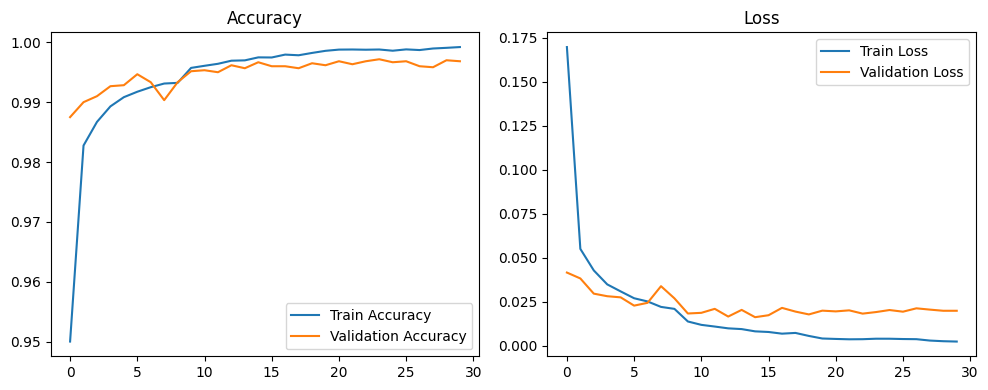

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

**Performance Analysis**

Validation Accuracy	99.68%
Test Accuracy	99.65%



**Input shape**: (28, 28, 1)


**Total Conv Layers**: 9 convolutional layers in 3 progressively deep blocks


**Downsampling**: Strided convolutions (stride=2) instead of pooling layers


**Normalization**: BatchNormalization after every convolution


**Regularization**: Dropout after each block (0.4)


**Final feature reduction**: GlobalAveragePooling2D()


**Output**: Dense layer with softmax, 10 units


Component	Value **bold text**
Optimizer	RMSprop(learning_rate=0.001, rho=0.9)

Loss	sparse_categorical_crossentropy
Batch Size	64

Epochs	Up to 100 (early stopped at 31)

Learning Rate Schedule	ReduceLROnPlateau (patience=3, factor=0.5)

Regularization	Dropout (0.4) + BatchNormalization
Final Downsampling	GlobalAveragePooling2D()

**Learnings**

Begin with a single convolution layer followed by max pooling.
Achieve high accuracy easily on MNIST.

Add multiple convolution layers before pooling.
Notice overfitting begins because validation loss curve starts going up.

Introduce Dropout & Batch normalization to help with overfitting.

Try out various combinations of hyperparameters and layers to achieve best performance.

Smaller batches give better generalization.
Stacking of 3x3 kernels helps with non-linearity and extracting features.

Using 5x5 kernels with stide 2 helps to reduce dimensions while learning.